<a href="https://colab.research.google.com/github/evanstos/plataformas_cognitivas/blob/desenvolvimento/Plataformas_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações

Imports de Pacotes

In [5]:
!pip install --upgrade "ibm-watson>=4.0.1"
!pip install --upgrade "azureml-core==1.0.83"
!pip install --upgrade "azureml-dataprep==1.1.35"
!pip install --upgrade "azure-cognitiveservices-vision-face==0.4.0"

     |████████████████████████████████| 378kB 3.3MB/s 
     |████████████████████████████████| 204kB 9.9MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-4.5.0-cp36-none-any.whl size=364301 sha256=2201b88796a0951fe11ee557ddbd253a604119c8a522d45b628633487e979cdc
  Stored in directory: /root/.cache/pip/wheels/71/9a/0a/9b3ca8eca69bc5362eb04709a750b30055a9d27818fd0c9494
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-1.5.1-cp36-none-any.whl size=44491 sha256=420e23e8582a24aff507ae22b7fcfc1d198941894aba1cf3541f09600f3d1b00
  Stored in directory: /root/.cache/pip/wheels/6a/42/50/f96888116b329578304f9dda4693cef6f3e76e18272d22cb6c
Successfully built ibm-watson ibm-cloud-sdk-core
     |████████████████████████████████| 1.2MB 3.3MB/s 
     |████████████████████████████████| 2.7MB 17.5MB/s 
     |████████████████████████████████| 153kB 32.3MB/s 
     |████████████████████████████████| 727kB 29.7MB/s 
     |████████████████████████████████| 972kB 38.5MB/s 
     |███████

In [3]:
!git clone https://github.com/evanstos/plataformas_cognitivas.git
!rm plataformas_cognitivas/Plataformas_Trabalho_Final.ipynb

Cloning into 'plataformas_cognitivas'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [6]:
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image as ImgPIL, ImageDraw
import json
import requests

Declaracao de variaveis

In [23]:
with open("./plataformas_cognitivas/cloudkeys/cloudkeys.json", 'r') as jsonfile:
    cloudKeys = json.load(jsonfile)

In [36]:
#Nome da Imagem
filename = "./plataformas_cognitivas/fotos/foto_cliente.jpg"
ENDPOINT_GCP    = cloudKeys["ModelInDocker"]["ENDPOINT"]
ENDPOINT_IBMVR  = cloudKeys["VisualRecognitionV3"]["ENDPOINT"]
ENDPOINT_AZURE  = cloudKeys["FacialDetection"]["ENDPOINT"]  

KEY_IBMVR = cloudKeys["VisualRecognitionV3"]["KEY"]
KEYAZURE  = cloudKeys["FacialDetection"]["KEY"] 

In [29]:
#https://cloud.ibm.com/
#Serviço: VisualRecognitionV3
#Get authenticator in Service credentials
authenticator = IAMAuthenticator(KEY_IBMVR)

In [30]:
#dont change version
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

In [31]:
visual_recognition.set_service_url(ENDPOINT_IBMVR)

In [ ]:
#Classificar Imagem em um Link
#url = 'https://ibm.biz/BdzLPG'
#classes_result = visual_recognition.classify(url=url).get_result()
#print(json.dumps(classes_result, indent=2))

In [ ]:
#Classificar imagem em um arquivo no local
#with open('terno.jpg', 'rb') as images_file:
#  classes_result = visual_recognition.classify(images_file=images_file).get_result()
#  print(json.dumps(classes_result, indent=2))

Função do google para capturar foto da webcam

In [32]:
def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Informações do cliente

In [55]:
#@title Preencha aqui com as informações do cliente requisitante

#@markdown Informe todos os campos a seguir:
nome = "Evandro dos Santos Oliveira" #@param {type:"string"}

renda =  6000#@param {type:"number"}
idade = 33 #@param {type:"slider", min:18, max:100, step:1}
etnia = "Etnia01"  #@param ["Selecionar etnia", "Etnia01", "Etnia02"]
genero = "Masculino" #@param ["Masculino", "Feminino"]
casa_propria = "Sim" #@param ["Selecionar", "Sim", "Nao"]
outras_rendas = "Nao" #@param ["Selecionar", "Sim", "Nao"]
estado_civil = "Estado01" #@param ["Selecionar", "Estado01", "Estado02"]
escolaridade = 3 #@param {type:"slider", min:0, max:3, step:1}

#@markdown ---


<IPython.core.display.Javascript object>

Saved to ./plataformas_cognitivas/fotos/foto_cliente.jpg


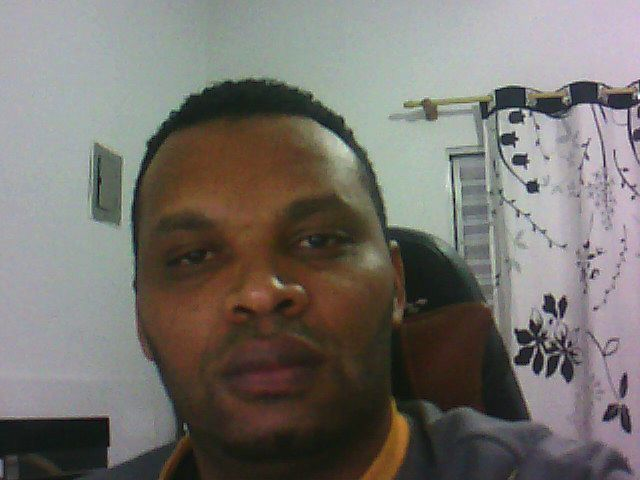

In [63]:
#@title Tire uma foto do cliente requerente (ou tire uma foto sua mesmo)

try:
  take_photo(filename)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Análise de crédito

1. Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; Se não possuir, informar mensagem e não conceder o empréstimo.


2.  Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; Se possuir, informar mensagem e não conceder o empréstimo.  


3. Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos), informar mensagem e não conceder o empréstimo.


4. Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure. (em uma aplicação corporativa, estes pontos ficam gravados para futuras autenticações)


5. Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud. Esta API deve usar os dados informados neste notebook e **automaticamente** vetar ou conceder o empréstimo.


ATENÇÃO PARA O BULLET 5: É necessário chamar tanto um modelo que possua a variável ETNIA quanto um modelo que não possui esta variável, assim como fizemos em aula!!!


6. Gravar um vídeo "operando" o notebook e simulando a avaliação com concessão ou reprovação do crédito.


7. Submeter o Notebook e o vídeo da plataforma da FIAP, se o vídeo ficar muito grande, submeter ao Youtube (pode ser privado) e anexar o Link.

---  
(Dica: Você pode usar este vídeo para divulgar seu trabalho como Engenheiro de ML)


In [41]:
def analysePicture(visual_recognition,urlPicture,threshold=0.7,classifier_ids="default"):
  '''
    Description:
      Função de Analise de Imagem utilizando a API Visual Recognition da IBM
      Verifica se a foto é de uma pessoa e se não possui conteúdo explícito

    Parameters:
      visual_recognition
        Objeto VisualRecognitionV3 já instânciado
      urlPicture
        URL da Imagem
      threshold
        Percentural de acurácia que a analise deve atingir para que a função tenha 
        um retorno positivo
      classifier_ids - API utilizada (default ou explicit) 
      
  '''

  foundClass = False

  if classifier_ids == "explicit":
    class_picture = "explicit"
  else: 
    class_picture = "person"

  with open(urlPicture, 'rb') as images_file:
    classes_result = visual_recognition.classify(images_file=images_file,threshold=threshold,classifier_ids=classifier_ids).get_result()

  classes = classes_result['images'][0]['classifiers'][0]['classes']
  
  for classe in classes:
    if classe.get("class") == class_picture:
      foundClass = True
      exit

  return foundClass

# 1. Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; Se não possuir, informar mensagem e não conceder o empréstimo.

# 2. Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; Se possuir, informar mensagem e não conceder o empréstimo.

In [42]:
#Teste da Função analysePicture
lPictureOK = False

#Analisa se a foto é de uma pessoa
if analysePicture(visual_recognition,filename,0.65):
  #Analisa se a foto possui conteudo explicito
  if not (analysePicture(visual_recognition,filename,0.75,"explicit")):
    lPictureOK = True
  
if lPictureOK:
  print("Pessoa Identificada. Foto Aprovada")
else:
  print("Não foi possível Identificar uma pessoa nesta foto. Try Again")

Pessoa Identificada. Foto Aprovada


# **Verificação de Gênero e Idade (AZURE)**


In [78]:
def drawCrossesOnFace(draw,faceLandmarks, size=2, color='white'):

  '''
    Description:
      Realiza a Pintura dos pontos fiduciais na Imagem

    Parameters:
      draw
        Objeto ImageDraw já instânciado
      faceLandmarks
        Pontos fiduciais
      size
        color - Cor dos pontos fiduciais 
      
  '''
  fl = faceLandmarks.as_dict()
  for l in fl.keys():
      x = fl[l]['x']
      y = fl[l]['y']
      draw.line(((x - size, y - size), (x + size, y + size)), fill=color)
      draw.line(((x - size, y + size), (x + size, y - size)), fill=color)
  pass
  return fl

In [79]:
#Sobe Imagem para API da Azure para realização da predição de idade e gênero
if __name__ == "__main__":
    #Cria o Client da API
    face_client = FaceClient(ENDPOINT_AZURE, CognitiveServicesCredentials(KEYAZURE))

    return_face_attributes = ["age", "gender", "headPose", "smile", "hair", "accessories", "facialHair", "glasses", "emotion",  "noise", "occlusion", "blur", "makeup"]
    with open(filename, 'r+b') as w:
        detected_faces = face_client.face.detect_with_stream(image=w, return_face_landmarks = True, return_face_attributes = return_face_attributes)
    pass

    for face in detected_faces:
      land = face.face_landmarks
      att =  face.face_attributes

# 3. Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos , informar mensagem e não conceder o empréstimo

In [80]:
attrib = att.as_dict()

#Verificação de Idade

idade_modelo = attrib['age']
genero_modelo = attrib['gender']

if idade <= (idade_modelo + 5)  and idade >= (idade_modelo - 5): 
  print("Idade da Imagem corresponde com o formulario - ok")
else:
  print("Idade da imagem não corresponde com o formulario - recusar")

Idade da Imagem corresponde com o formulario - ok


In [81]:
#Verificação de Genero
if (genero_modelo == "male" and genero == "Masculino") or (genero_modelo == "female" and genero == "Feminino"):
  print("Gênero da Imagem corresponde com o formulario - ok")
else:
  print("Gênero da Imagem não corresponde com o formulario - recusar")


Gênero da Imagem corresponde com o formulario - ok


# 4. Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure.

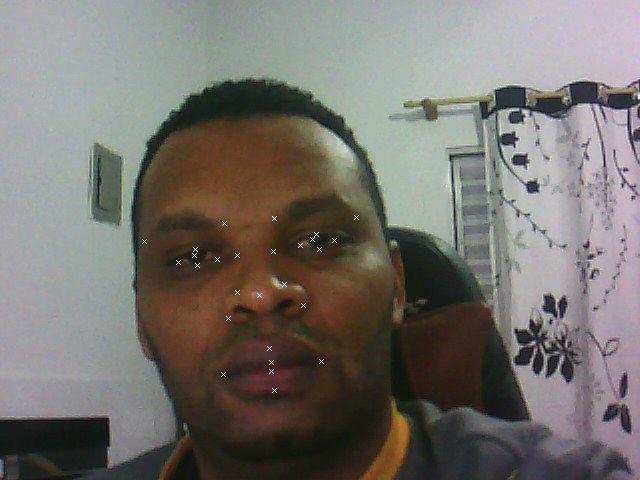

In [82]:
img = ImgPIL.open(filename)
draw = ImageDraw.Draw(img)

drawCrossesOnFace(draw,land, size=2, color='white')
display(img)


# 5. Treinar um modelo na tecnologia e framework que preferir para ser consumido pelo próximo item

# 6. Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud

In [83]:
#criando body
chave = {}
chave['renda'] = {"1" : renda}
chave['idade'] = {"1" : idade}
chave['etnia'] = {"1" : 1 if etnia == "Etnia01" else 2}
chave['outras_rendas'] = {"1" : 1 if outras_rendas == "Sim" else 2 } 
chave['sexo'] = {"1" : 1 if genero == "Masculino" else 2} 
chave['casapropria'] = {"1" : 1 if casa_propria == "Sim" else 2 }
chave['estadocivil'] = {"1" : 1 if estado_civil == "Estado01" else 2}
chave['escolaridade'] = {"1" : escolaridade}
chave['default'] = {"1" : 0}

body = json.dumps(chave, indent=0)

In [84]:
headers = {'Content-Type': 'application/json'}
response = requests.request("POST",ENDPOINT_GCP, headers=headers, data=body)
aprovacao = json.loads(response.text.encode('utf8').decode())

In [85]:
print('credito aprovado' if aprovacao['prediction'][0] == 0 else 'credito rejeitado')

credito aprovado
